In [146]:
import pandas as pd
from unidecode import unidecode
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Objetivo 
Busco quantificar o posicionamento ideológico dos partidos políticos, segundo 2 dimensões, pensadas a partir do Diagrama de Nolan: a dimensão econômica, onde os partidos serão posicionados segundo a maior ou menor afinidade a autas liberais; e a dimensão de costumes, onde serão posicionados segundo a maior ou menor afinidade a pautas progressistas.

### Fontes de dados das votações
A maioria veio dos dados abertos da Câmara: https://dadosabertos.camara.leg.br/swagger/api.html#staticfile

A votação do Auxílio emergencial para o setor cultural foi simbólica: https://www.camara.leg.br/presenca-comissoes/votacao-portal?reuniao=59642&itemVotacao=29856

A PEC da redução da maioridade penal tem votação neste link: https://congressoemfoco.uol.com.br/especial/noticias/confira-como-cada-parlamentar-votou-no-2%C2%BA-turno-da-pec-da-maioridade-penal/

O PL 4567/2016, sobre exploração do Pré-Sal, por algum motivo não está na base de dados abertos da Câmara. Obtive os votos neste link: https://vermelho.org.br/2016/10/06/saiba-como-votou-cada-deputado-na-entrega-do-pre-sal-e-da-petrobras/

---*---*---

### 1. Análise das proposições e votações na Câmara

In [147]:
df_cam_proposicoes = pd.concat([pd.read_csv('../dados_camara/proposicoes-2016.csv', sep = ';', encoding = 'utf8')\
                               ,pd.read_csv('../dados_camara/proposicoes-2017.csv', sep = ';', encoding = 'utf8')\
                               ,pd.read_csv('../dados_camara/proposicoes-2018.csv', sep = ';', encoding = 'utf8')\
                               ,pd.read_csv('../dados_camara/proposicoes-2019.csv', sep = ';', encoding = 'utf8')\
                               ,pd.read_csv('../dados_camara/proposicoes-2020.csv', sep = ';', encoding = 'utf8')\
                               ])

df_cam_votacoes = pd.concat([pd.read_csv('../dados_camara/votacoes-2016.csv', sep = ';', encoding = 'utf8')\
                            ,pd.read_csv('../dados_camara/votacoes-2017.csv', sep = ';', encoding = 'utf8')\
                            ,pd.read_csv('../dados_camara/votacoes-2018.csv', sep = ';', encoding = 'utf8')\
                            ,pd.read_csv('../dados_camara/votacoes-2019.csv', sep = ';', encoding = 'utf8')\
                            ,pd.read_csv('../dados_camara/votacoes-2020.csv', sep = ';', encoding = 'utf8')\
                            ])

df_cam_votos = pd.concat([pd.read_csv('../dados_camara/votacoesVotos-2016.csv', sep = ';', encoding = 'utf8')\
                         ,pd.read_csv('../dados_camara/votacoesVotos-2017.csv', sep = ';', encoding = 'utf8')\
                         ,pd.read_csv('../dados_camara/votacoesVotos-2018.csv', sep = ';', encoding = 'utf8')\
                         ,pd.read_csv('../dados_camara/votacoesVotos-2019.csv', sep = ';', encoding = 'utf8')\
                         ,pd.read_csv('../dados_camara/votacoesVotos-2020.csv', sep = ';', encoding = 'utf8')\
                         ])

In [148]:
df_cam_proposicoes.head(3)

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,ultimoStatus_idOrgao,ultimoStatus_siglaOrgao,ultimoStatus_uriOrgao,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,ultimoStatus_idTipoTramitacao,ultimoStatus_descricaoSituacao,ultimoStatus_idSituacao,ultimoStatus_despacho,ultimoStatus_url
0,1514275,https://dadosabertos.camara.leg.br/api/v2/prop...,PRL,3,0,190,Parecer do Relator,"Parecer do Relator, Dep. Severino Ninho (PSB-P...",NaN,NaN,...,NaN,NaN,NaN,NaN,Análise Parecer,319,NaN,NaN,"Parecer do Relator, Dep. Severino Ninho (PSB-P...",http://www.camara.gov.br/proposicoesWeb/prop_m...
1,1736089,https://dadosabertos.camara.leg.br/api/v2/prop...,PAR,2,0,187,Parecer de Comissão,Aprovada a redação para o segundo turno de dis...,NaN,NaN,...,NaN,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Parecer de Comissão, PAR 1 PEC...",http://www.camara.gov.br/proposicoesWeb/prop_m...
2,1779143,https://dadosabertos.camara.leg.br/api/v2/prop...,PAR,2,0,187,Parecer de Comissão,Aprovada a Proposta de Redação para o Segundo ...,NaN,NaN,...,NaN,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Parecer de Comissão, PAR 1 PEC...",http://www.camara.gov.br/proposicoesWeb/prop_m...


In [149]:
len(set(df_cam_proposicoes['id']))

144231

In [150]:
len(df_cam_proposicoes)

144231

In [151]:
df_cam_votacoes.head(3)

,id,uri,data,dataHoraRegistro,idOrgao,uriOrgao,siglaOrgao,idEvento,uriEvento,aprovacao,votosSim,votosNao,votosOutros,descricao,ultimaAberturaVotacao_dataHoraRegistro,ultimaAberturaVotacao_descricao,ultimaApresentacaoProposicao_dataHoraRegistro,ultimaApresentacaoProposicao_descricao,ultimaApresentacaoProposicao_idProposicao,ultimaApresentacaoProposicao_uriProposicao
0,2076668-2,https://dadosabertos.camara.leg.br/api/v2/vota...,2016-02-02,2016-02-03T10:47:46,537732,https://dadosabertos.camara.leg.br/api/v2/orga...,CPIANIM,42847,https://dadosabertos.camara.leg.br/api/v2/even...,1.0,0,0,0,Aprovado o destaque. Rejeitada a matéria desta...,NaN,NaN,2016-02-03T10:13:18,"Apresentação do Destaque n. 1 CPIANIM, pelo De...",0,NaN
1,2076671-2,https://dadosabertos.camara.leg.br/api/v2/vota...,2016-02-02,2016-02-03T10:49:37,537732,https://dadosabertos.camara.leg.br/api/v2/orga...,CPIANIM,42847,https://dadosabertos.camara.leg.br/api/v2/even...,1.0,0,0,0,Aprovado o destaque. Rejeitado o texto destaca...,NaN,NaN,2016-02-03T10:18:46,"Apresentação do Destaque n. 2 CPIANIM, pelo De...",0,NaN
2,2076675-2,https://dadosabertos.camara.leg.br/api/v2/vota...,2016-02-02,2016-02-03T10:51:29,537732,https://dadosabertos.camara.leg.br/api/v2/orga...,CPIANIM,42847,https://dadosabertos.camara.leg.br/api/v2/even...,1.0,0,0,0,Aprovado o destaque. Rejeitado o texto destaca...,NaN,NaN,2016-02-03T10:39:02,"Apresentação do Destaque n. 5 CPIANIM, pelo De...",0,NaN


In [152]:
df_cam_votacoes['id_parte'] = df_cam_votacoes['id'].apply(lambda x: x.split('-')[0])
df_cam_votacoes['id_parte_int'] = df_cam_votacoes['id_parte'].apply(lambda x: int(x))

In [153]:
len(set(df_cam_votacoes['id']))

27130

In [154]:
len(set(df_cam_votacoes['id_parte']))

19703

In [155]:
len(df_cam_votacoes)

27130

In [156]:
df_cam_votos.head(3)

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
0,1063052-105,https://dadosabertos.camara.leg.br/api/v2/vota...,2016-03-22T18:20:16,Sim,178957,https://dadosabertos.camara.leg.br/api/v2/depu...,Abel Mesquita Jr.,DEM,https://dadosabertos.camara.leg.br/api/v2/part...,RR,55,http://www.camara.gov.br/internet/deputado/ban...
1,1063052-105,https://dadosabertos.camara.leg.br/api/v2/vota...,2016-03-22T18:16:16,Sim,178890,https://dadosabertos.camara.leg.br/api/v2/depu...,Adelmo Carneiro Leão,PT,https://dadosabertos.camara.leg.br/api/v2/part...,MG,55,http://www.camara.gov.br/internet/deputado/ban...
2,1063052-105,https://dadosabertos.camara.leg.br/api/v2/vota...,2016-03-22T18:10:03,Sim,178968,https://dadosabertos.camara.leg.br/api/v2/depu...,Adelson Barreto,PR,https://dadosabertos.camara.leg.br/api/v2/part...,SE,55,http://www.camara.gov.br/internet/deputado/ban...


##### -> Detalhamento de uma votação

In [201]:
df_cam_proposicoes[df_cam_proposicoes['id'] == 593065]

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,ultimoStatus_idOrgao,ultimoStatus_siglaOrgao,ultimoStatus_uriOrgao,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,ultimoStatus_idTipoTramitacao,ultimoStatus_descricaoSituacao,ultimoStatus_idSituacao,ultimoStatus_despacho,ultimoStatus_url
0,593065,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,4476,2020,139,Projeto de Lei,Dispõe sobre medidas para fomentar a Indústria...,NaN,"Alteração, metodologia, fixação, preço, desenv...",...,180.0,PLEN,https://dadosabertos.camara.leg.br/api/v2/orga...,"Urgência (Art. 155, RICD)",Encerramentos,1244,Pronta para Pauta,924.0,Matéria não apreciada em face do encerramento ...,NaN


In [200]:
df_cam_votacoes[(df_cam_votacoes['id_parte'] == '593065')][['id', 'votosSim', 'votosNao']]

,id,votosSim,votosNao
6329,593065-90,0,0
7059,593065-112,0,0
913,593065-129,0,0
914,593065-130,0,0
1083,593065-141,85,224
1084,593065-172,91,275
1085,593065-178,351,101
1086,593065-182,0,0
1087,593065-189,115,355
1088,593065-195,0,0


In [208]:
df_cam_votos[(df_cam_votos['idVotacao'] == '593065-178')]

,idVotacao,uriVotacao,dataHoraVoto,voto,deputado_id,deputado_uri,deputado_nome,deputado_siglaPartido,deputado_uriPartido,deputado_siglaUf,deputado_idLegislatura,deputado_urlFoto
156414,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
156415,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...
156416,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,http://www.camara.gov.br/internet/deputado/ban...
156417,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
156418,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,http://www.camara.gov.br/internet/deputado/ban...
156419,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,121948,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriano do Baldy,PP,https://dadosabertos.camara.leg.br/api/v2/part...,GO,56,http://www.camara.gov.br/internet/deputado/ban...
156420,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Sim,74646,https://dadosabertos.camara.leg.br/api/v2/depu...,Aécio Neves,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,http://www.camara.gov.br/internet/deputado/ban...
156421,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Não,160508,https://dadosabertos.camara.leg.br/api/v2/depu...,Afonso Florence,PT,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,http://www.camara.gov.br/internet/deputado/ban...
156422,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Não,178835,https://dadosabertos.camara.leg.br/api/v2/depu...,Afonso Motta,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,RS,56,http://www.camara.gov.br/internet/deputado/ban...
156423,593065-178,https://dadosabertos.camara.leg.br/api/v2/vota...,2020-09-01T20:39:57,Não,204495,https://dadosabertos.camara.leg.br/api/v2/depu...,Airton Faleiro,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PA,56,http://www.camara.gov.br/internet/deputado/ban...


In [209]:
df_cam_votos[df_cam_votos['idVotacao'] == '593065-178'].iloc[0]['uriVotacao']

'https://dadosabertos.camara.leg.br/api/v2/votacoes/593065-178'

---*---*---

#### 1.1. Criando tabela de posicionamentos por partido

In [161]:
# Preciso antes corrigir a tebela de votos, pois partidos mudaram de sigla entre um ano e outro.
def corrige_siglas(x):
    if x == 'PMDB':
        y = 'MDB'
    elif x == 'PR':
        y = 'PL'
    elif x == 'PPS':
        y = 'CIDADANIA'
    elif x == 'PRB':
        y = 'REPUBLICANOS'
    elif x == 'SD':
        y = 'SOLIDARIEDADE'
    elif x == 'PODE':
        y = 'PODEMOS'
    elif x == 'PHS':
        y = 'PODEMOS'
    elif x == 'PTN':
        y = 'PODEMOS'
    elif x == 'PRP':
        y = 'PATRIOTA'
    elif x == 'PEN':
        y = 'PATRIOTA'
    elif x == 'PT do B':
        y = 'AVANTE'
    elif x == 'PTdoB':
        y = 'AVANTE'
    elif x == 'PSDC':
        y = 'DC'
    elif x == 'PPL':
        y = 'PCdoB'
    elif x == 'PATRI':
        y = 'PATRIOTA'
    else:
        y = x
    return y

df_cam_votos['deputado_siglaPartido'] = df_cam_votos['deputado_siglaPartido'].map(corrige_siglas)

##### -> Carregando dados das votações selecionadas

In [162]:
# Serão consideradas as votações abaixo. Crio aqui um dicionário com informações básicas sobre elas:
# Colunas: [Resumo da ementa, eixo, polaridade, id_votacao]

metadados_proposicoes = {}
### Novos ###
metadados_proposicoes['PL 3261/2019'] = ['Marco legal do saneamento básico', 'liberalismo', 1, '2207613-167']
metadados_proposicoes['PEC 6/2019'] = ['Reforma da Previdência', 'liberalismo', 1, '2192459-636']
metadados_proposicoes['MPV 881/2019'] = ['MP da Liberdade Econômica', 'liberalismo', 1, '2199763-58']
metadados_proposicoes['PL 4476/2020'] = ['Desregulamentação do setor do Gás Natural', 'liberalismo', 1, '593065-178']
metadados_proposicoes['PL 4372/2020'] = ['Destaque para permitir a participação de entidades privadas no Novo FUNDEB', 'liberalismo', -1, '2261121-177']
metadados_proposicoes['PL 4199/2020'] = ['BR do Mar (estímulo ao transporte por cabotagem)', 'liberalismo', 1, '2260433-96']
metadados_proposicoes['MPV 897/2019'] = ['MP do Crédito Rural', 'liberalismo', 1, '2222884-62']
metadados_proposicoes['PL 3723/2019'] = ['Flexibilização do comércio de armas de fogo', 'progressismo', -1, '2209381-100']
metadados_proposicoes['PL 1581/2020'] = ['Emenda a projeto que trata de perdão de dívidas com a União, incluindo igrejas', 'progressismo', -1, '2243108-76']
metadados_proposicoes['PDC 861/2017'] = ['Convenção Interamericana de Combate ao Racismo', 'progressismo', 1, '2164132-60']

### Antigos ###
metadados_proposicoes['MPV 746/2016'] = ['Reforma curricular do ensino médio', 'progressismo', -1, '2112490-66']
metadados_proposicoes['PEC 241/2016'] = ['PEC do Teto de Gastos', 'liberalismo', 1, '2088351-235']
metadados_proposicoes['PL 4302/1998'] = ['Flexibilização da terceirização', 'liberalismo', 1, '20794-133']
metadados_proposicoes['PEC 395/2014'] = ['Cobrança de mensalidade em cursos de especialização em universidades públicas', 'liberalismo', 1, '611966-202']
metadados_proposicoes['PL 6787/2016'] = ['Reforma trabalhista', 'liberalismo', 1, '2122076-348']

### Sem informação na base de dados abertos ###
metadados_proposicoes['PL 4567/2016'] = ['Retira participação obrigatória da Petrobras no pré-sal', 'liberalismo', 1, 'sem_info']
metadados_proposicoes['PEC 171/1993'] = ['Redução da maioridade penal', 'progressismo', -1, 'sem_info']
metadados_proposicoes['PL 1075/2020'] = ['Auxílio emergencial para o setor cultural (Lei Aldir Blanc)', 'progressismo', 1, 'sem_info']


In [163]:
lista_proposicoes = list(metadados_proposicoes.keys())

proposicao = lista_proposicoes[0]
id_votacao = metadados_proposicoes[proposicao][-1]

df_resumo_posicionamentos = df_cam_votos[df_cam_votos['idVotacao'] == id_votacao][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index()\
                    .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Sim')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                    .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Não')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                    .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Abstenção')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                    .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Artigo 17')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                    .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Obstrução')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)

df_resumo_posicionamentos['proposicao'] = proposicao
df_resumo_posicionamentos['ementa'] = metadados_proposicoes[proposicao][0]

df_resumo_posicionamentos.columns = ['Partido', 'Total de Votos', 'Sim', 'Não', 'Abstenção', 'Artigo 17', 'Obstrução', 'Proposição', 'Ementa']


In [164]:
for i in lista_proposicoes[1:-3]:

    proposicao = i
    id_votacao = metadados_proposicoes[proposicao][-1]

    df_temp = df_cam_votos[df_cam_votos['idVotacao'] == id_votacao][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index()\
                        .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Sim')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                        .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Não')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                        .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Abstenção')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                        .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Artigo 17')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)\
                        .merge(df_cam_votos[(df_cam_votos['idVotacao'] == id_votacao) & (df_cam_votos['voto'] == 'Obstrução')][['deputado_siglaPartido', 'voto']].groupby(['deputado_siglaPartido']).count().reset_index(), on = 'deputado_siglaPartido', how = 'left').fillna(0)

    df_temp['proposicao'] = proposicao
    df_temp['ementa'] = metadados_proposicoes[proposicao][0]

    df_temp.columns = ['Partido', 'Total de Votos', 'Sim', 'Não', 'Abstenção', 'Artigo 17', 'Obstrução', 'Proposição', 'Ementa']
    df_resumo_posicionamentos = pd.concat([df_resumo_posicionamentos, df_temp])
    

In [165]:
df_resumo_posicionamentos.head(10)

,Partido,Total de Votos,Sim,Não,Abstenção,Artigo 17,Obstrução,Proposição,Ementa
0,AVANTE,7,5.0,2.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
1,CIDADANIA,9,9.0,0.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
2,DEM,18,17.0,0.0,0.0,1.0,0.0,PL 3261/2019,Marco legal do saneamento básico
3,MDB,28,26.0,1.0,1.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
4,NOVO,8,8.0,0.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
5,PATRIOTA,4,4.0,0.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
6,PCdoB,8,0.0,8.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
7,PDT,23,8.0,15.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
8,PL,26,23.0,3.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico
9,PODEMOS,8,5.0,3.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico


In [166]:
df_resumo_posicionamentos['contra'] = df_resumo_posicionamentos.copy()['Não'] + df_resumo_posicionamentos.copy()['Obstrução']


In [167]:
df_resumo_posicionamentos['perc_favor'] = df_resumo_posicionamentos.copy()['Sim']/df_resumo_posicionamentos.copy()['Total de Votos']
df_resumo_posicionamentos['perc_contra'] = df_resumo_posicionamentos.copy()['contra']/df_resumo_posicionamentos.copy()['Total de Votos']
df_resumo_posicionamentos['ind_posicionamento'] = df_resumo_posicionamentos['perc_favor'] - df_resumo_posicionamentos['perc_contra']


In [168]:
df_resumo_posicionamentos.head()

,Partido,Total de Votos,Sim,Não,Abstenção,Artigo 17,Obstrução,Proposição,Ementa,contra,perc_favor,perc_contra,ind_posicionamento
0,AVANTE,7,5.0,2.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico,2.0,0.714286,0.285714,0.428571
1,CIDADANIA,9,9.0,0.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico,0.0,1.000000,0.000000,1.000000
2,DEM,18,17.0,0.0,0.0,1.0,0.0,PL 3261/2019,Marco legal do saneamento básico,0.0,0.944444,0.000000,0.944444
3,MDB,28,26.0,1.0,1.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico,1.0,0.928571,0.035714,0.892857
4,NOVO,8,8.0,0.0,0.0,0.0,0.0,PL 3261/2019,Marco legal do saneamento básico,0.0,1.000000,0.000000,1.000000


In [169]:
df_resumo_posicionamentos_ = df_resumo_posicionamentos[['Partido', 'Proposição', 'ind_posicionamento']].pivot(index="Partido", columns="Proposição", values="ind_posicionamento").reset_index()


In [170]:
df_resumo_posicionamentos_ = df_resumo_posicionamentos_[(df_resumo_posicionamentos_['Partido'] != 'PMB') &\
                                                        (df_resumo_posicionamentos_['Partido'] != 'PMN') &\
                                                        (df_resumo_posicionamentos_['Partido'] != 'S.PART.')]

df_resumo_posicionamentos_.head()


Proposição,Partido,MPV 746/2016,MPV 881/2019,MPV 897/2019,PDC 861/2017,PEC 241/2016,PEC 395/2014,PEC 6/2019,PL 1581/2020,PL 3261/2019,PL 3723/2019,PL 4199/2020,PL 4302/1998,PL 4372/2020,PL 4476/2020,PL 6787/2016
0,AVANTE,0.000000,1.000000,1.0000,1.00,0.333333,-0.333333,0.714286,1.000000,0.428571,0.333333,0.666667,0.000000,0.00,1.000000,-0.500000
1,CIDADANIA,1.000000,1.000000,1.0000,0.75,0.142857,1.000000,1.000000,0.750000,1.000000,0.750000,1.000000,-0.250000,0.75,1.000000,0.333333
2,DEM,0.956522,0.956522,0.9375,0.84,0.880000,0.807692,1.000000,0.928571,0.944444,0.894737,0.884615,0.320000,0.16,0.962963,0.966667
3,MDB,0.934783,1.000000,1.0000,1.00,1.000000,0.686275,1.000000,1.000000,0.892857,0.750000,1.000000,0.522727,0.92,1.000000,0.758621
4,NOVO,NaN,1.000000,1.0000,-1.00,NaN,NaN,1.000000,-0.875000,1.000000,1.000000,1.000000,NaN,-1.00,1.000000,NaN


In [171]:
df_complemento_posicionamentos = pd.read_excel('posicionamentos_extras.xlsx')

In [190]:
df_complemento_posicionamentos.head(5)

,Partido,Outros nomes,PL 1075/2020,PEC 171/1993,PL 4567/2016
0,AVANTE,PTdoB,1,1.00,-0.33
1,CIDADANIA,PPS,1,-0.27,1.00
2,DEM,NaN,1,0.90,1.00
3,MDB,PMDB,1,0.54,0.89
4,NOVO,NaN,-1,NaN,NaN


In [173]:
df_resumo_posicionamentos_ = df_resumo_posicionamentos_.merge(df_complemento_posicionamentos[['Partido', 'PL 1075/2020', 'PEC 171/1993', 'PL 4567/2016']])


In [174]:
df_resumo_posicionamentos_.head()

,Partido,MPV 746/2016,MPV 881/2019,MPV 897/2019,PDC 861/2017,PEC 241/2016,PEC 395/2014,PEC 6/2019,PL 1581/2020,PL 3261/2019,PL 3723/2019,PL 4199/2020,PL 4302/1998,PL 4372/2020,PL 4476/2020,PL 6787/2016,PL 1075/2020,PEC 171/1993,PL 4567/2016
0,AVANTE,0.000000,1.000000,1.0000,1.00,0.333333,-0.333333,0.714286,1.000000,0.428571,0.333333,0.666667,0.000000,0.00,1.000000,-0.500000,1,1.00,-0.33
1,CIDADANIA,1.000000,1.000000,1.0000,0.75,0.142857,1.000000,1.000000,0.750000,1.000000,0.750000,1.000000,-0.250000,0.75,1.000000,0.333333,1,-0.27,1.00
2,DEM,0.956522,0.956522,0.9375,0.84,0.880000,0.807692,1.000000,0.928571,0.944444,0.894737,0.884615,0.320000,0.16,0.962963,0.966667,1,0.90,1.00
3,MDB,0.934783,1.000000,1.0000,1.00,1.000000,0.686275,1.000000,1.000000,0.892857,0.750000,1.000000,0.522727,0.92,1.000000,0.758621,1,0.54,0.89
4,NOVO,NaN,1.000000,1.0000,-1.00,NaN,NaN,1.000000,-0.875000,1.000000,1.000000,1.000000,NaN,-1.00,1.000000,NaN,-1,NaN,NaN


### 2. Quantificação do posicionamento (proxy Nolan)
Faço uma aproximação dos indicadores do Diagrama de Nolan (https://pt.wikipedia.org/wiki/Diagrama_de_Nolan).

A principal liberdade que tomo é modificar o eixo "liberdades individuais", passando a focar nas pautas que rotineiramente vêm sendo defendidas por alas progressistas do congresso. Essas pautas não necessariamente têm a ver com costumes, que é o foco que Nolan dá. Dizem mais respeito a políticas positivas de resolução de desigualdades étnicas ou de gênero, bem como posicionamentos restritivos à persecução penal. Por isso, meu diagrama não tem um eixo "liberdades individuais" e sim "progressista". Fazer essa mudança pareceu ser mais adequado à realidade do que vem sendo discutido no Congresso nos últimos anos (pautas essencialmente de costumes não têm passado por lá).


In [175]:
df_resumo_posicionamentos_.head()

,Partido,MPV 746/2016,MPV 881/2019,MPV 897/2019,PDC 861/2017,PEC 241/2016,PEC 395/2014,PEC 6/2019,PL 1581/2020,PL 3261/2019,PL 3723/2019,PL 4199/2020,PL 4302/1998,PL 4372/2020,PL 4476/2020,PL 6787/2016,PL 1075/2020,PEC 171/1993,PL 4567/2016
0,AVANTE,0.000000,1.000000,1.0000,1.00,0.333333,-0.333333,0.714286,1.000000,0.428571,0.333333,0.666667,0.000000,0.00,1.000000,-0.500000,1,1.00,-0.33
1,CIDADANIA,1.000000,1.000000,1.0000,0.75,0.142857,1.000000,1.000000,0.750000,1.000000,0.750000,1.000000,-0.250000,0.75,1.000000,0.333333,1,-0.27,1.00
2,DEM,0.956522,0.956522,0.9375,0.84,0.880000,0.807692,1.000000,0.928571,0.944444,0.894737,0.884615,0.320000,0.16,0.962963,0.966667,1,0.90,1.00
3,MDB,0.934783,1.000000,1.0000,1.00,1.000000,0.686275,1.000000,1.000000,0.892857,0.750000,1.000000,0.522727,0.92,1.000000,0.758621,1,0.54,0.89
4,NOVO,NaN,1.000000,1.0000,-1.00,NaN,NaN,1.000000,-0.875000,1.000000,1.000000,1.000000,NaN,-1.00,1.000000,NaN,-1,NaN,NaN


In [176]:
df_resumo_posicionamentos_.columns

Index(['Partido', 'MPV 746/2016', 'MPV 881/2019', 'MPV 897/2019',
       'PDC 861/2017', 'PEC 241/2016', 'PEC 395/2014', 'PEC 6/2019',
       'PL 1581/2020', 'PL 3261/2019', 'PL 3723/2019', 'PL 4199/2020',
       'PL 4302/1998', 'PL 4372/2020', 'PL 4476/2020', 'PL 6787/2016',
       'PL 1075/2020', 'PEC 171/1993', 'PL 4567/2016'],
      dtype='object')

In [177]:
for coluna in list(metadados_proposicoes.keys()):
    df_resumo_posicionamentos_[coluna+'_notas'] = df_resumo_posicionamentos_[coluna]*metadados_proposicoes[coluna][2]

In [178]:
df_resumo_posicionamentos_.head()

,Partido,MPV 746/2016,MPV 881/2019,MPV 897/2019,PDC 861/2017,PEC 241/2016,PEC 395/2014,PEC 6/2019,PL 1581/2020,PL 3261/2019,...,PL 1581/2020_notas,PDC 861/2017_notas,MPV 746/2016_notas,PEC 241/2016_notas,PL 4302/1998_notas,PEC 395/2014_notas,PL 6787/2016_notas,PL 4567/2016_notas,PEC 171/1993_notas,PL 1075/2020_notas
0,AVANTE,0.000000,1.000000,1.0000,1.00,0.333333,-0.333333,0.714286,1.000000,0.428571,...,-1.000000,1.00,-0.000000,0.333333,0.000000,-0.333333,-0.500000,-0.33,-1.00,1
1,CIDADANIA,1.000000,1.000000,1.0000,0.75,0.142857,1.000000,1.000000,0.750000,1.000000,...,-0.750000,0.75,-1.000000,0.142857,-0.250000,1.000000,0.333333,1.00,0.27,1
2,DEM,0.956522,0.956522,0.9375,0.84,0.880000,0.807692,1.000000,0.928571,0.944444,...,-0.928571,0.84,-0.956522,0.880000,0.320000,0.807692,0.966667,1.00,-0.90,1
3,MDB,0.934783,1.000000,1.0000,1.00,1.000000,0.686275,1.000000,1.000000,0.892857,...,-1.000000,1.00,-0.934783,1.000000,0.522727,0.686275,0.758621,0.89,-0.54,1
4,NOVO,NaN,1.000000,1.0000,-1.00,NaN,NaN,1.000000,-0.875000,1.000000,...,0.875000,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [179]:
lista_projetos_eixo_liberal = [k+'_notas' for k in list(metadados_proposicoes.keys()) if metadados_proposicoes[k][1] == 'liberalismo']
lista_projetos_eixo_progressista = [k+'_notas' for k in list(metadados_proposicoes.keys()) if metadados_proposicoes[k][1] == 'progressismo']


In [197]:
print('Pautas do eixo Progressismo Social')
for i in [k for k in list(metadados_proposicoes.keys()) if metadados_proposicoes[k][1] == 'progressismo']:
    print(i + ': ' + metadados_proposicoes[i][0] + '; Polaridade = ' + str(metadados_proposicoes[i][2]))

Pautas do eixo Progressismo Social
PL 3723/2019: Flexibilização do comércio de armas de fogo; Polaridade = -1
PL 1581/2020: Emenda a projeto que trata de perdão de dívidas com a União, incluindo igrejas; Polaridade = -1
PDC 861/2017: Convenção Interamericana de Combate ao Racismo; Polaridade = 1
MPV 746/2016: Reforma curricular do ensino médio; Polaridade = -1
PEC 171/1993: Redução da maioridade penal; Polaridade = -1
PL 1075/2020: Auxílio emergencial para o setor cultural (Lei Aldir Blanc); Polaridade = 1


In [180]:
def calcula_media_eixo_liberalismo(row):
    y = np.nanmean(list(row[lista_projetos_eixo_liberal]))
    return y
    
def calcula_media_eixo_progressismo(row):
    y = np.nanmean(list(row[lista_projetos_eixo_progressista]))
    return y

df_resumo_posicionamentos_['media_eixo_liberalismo'] = df_resumo_posicionamentos_.apply(calcula_media_eixo_liberalismo, axis = 1)
df_resumo_posicionamentos_['media_eixo_progressismo'] = df_resumo_posicionamentos_.apply(calcula_media_eixo_progressismo, axis = 1)

    

In [205]:
df_resumo_posicionamentos_[df_resumo_posicionamentos_['Partido'] == 'REDE'][lista_projetos_eixo_liberal]

,PL 3261/2019_notas,PEC 6/2019_notas,MPV 881/2019_notas,PL 4476/2020_notas,PL 4372/2020_notas,PL 4199/2020_notas,MPV 897/2019_notas,PEC 241/2016_notas,PL 4302/1998_notas,PEC 395/2014_notas,PL 6787/2016_notas,PL 4567/2016_notas
21,NaN,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5,-1.0,-1.0


In [182]:
df_resumo_posicionamentos_[['Partido', 'media_eixo_liberalismo', 'media_eixo_progressismo']]

,Partido,media_eixo_liberalismo,media_eixo_progressismo
0,AVANTE,0.331627,-0.055556
1,CIDADANIA,0.623016,-0.080000
2,DEM,0.791700,-0.306638
3,MDB,0.735873,-0.204130
4,NOVO,1.000000,-0.531250
5,PATRIOTA,0.719167,-0.111111
6,PCdoB,-1.000000,0.666667
7,PDT,-0.389479,0.652924
8,PL,0.761379,-0.304526
9,PODEMOS,0.495719,-0.133606


(-1, 1.077646729390681)

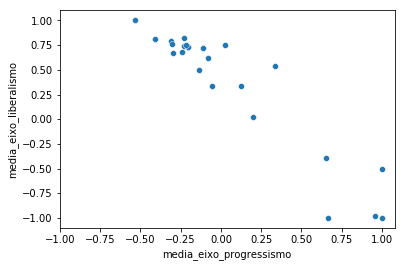

In [183]:
sns.scatterplot(data=df_resumo_posicionamentos_[['Partido', 'media_eixo_liberalismo', 'media_eixo_progressismo']], x="media_eixo_progressismo", y="media_eixo_liberalismo")
plt.xlim(-1, None)




In [184]:
df_resumo_posicionamentos_[['Partido', 'media_eixo_liberalismo', 'media_eixo_progressismo']].to_excel('df_resumo_posicionamentos_.xlsx')

##### -> Grupos ideológicos

In [185]:
def posicionamento(row):
    if row['media_eixo_liberalismo'] > 0 and row['media_eixo_progressismo'] > 0:
        y = 'liberal_progressista'
    elif row['media_eixo_liberalismo'] > 0 and row['media_eixo_progressismo'] < 0:
        y = 'liberal_conservador'
    elif row['media_eixo_liberalismo'] < 0 and row['media_eixo_progressismo'] < 0:
        y = 'intervencionista_conservador'
    else:
        y = 'intervencionista_progressista'
    return y

df_resumo_posicionamentos_['grupo_ideologico'] = df_resumo_posicionamentos_.apply(posicionamento, axis = 1)

In [186]:
df_resumo_posicionamentos_[['Partido', 'grupo_ideologico']]

,Partido,grupo_ideologico
0,AVANTE,liberal_conservador
1,CIDADANIA,liberal_conservador
2,DEM,liberal_conservador
3,MDB,liberal_conservador
4,NOVO,liberal_conservador
5,PATRIOTA,liberal_conservador
6,PCdoB,intervencionista_progressista
7,PDT,intervencionista_progressista
8,PL,liberal_conservador
9,PODEMOS,liberal_conservador


In [187]:
df_resumo_posicionamentos_.to_pickle('df_resumo_posicionamentos_pickle')

In [188]:
df_resumo_posicionamentos_

,Partido,MPV 746/2016,MPV 881/2019,MPV 897/2019,PDC 861/2017,PEC 241/2016,PEC 395/2014,PEC 6/2019,PL 1581/2020,PL 3261/2019,...,PEC 241/2016_notas,PL 4302/1998_notas,PEC 395/2014_notas,PL 6787/2016_notas,PL 4567/2016_notas,PEC 171/1993_notas,PL 1075/2020_notas,media_eixo_liberalismo,media_eixo_progressismo,grupo_ideologico
0,AVANTE,0.000000,1.000000,1.000000,1.000000,0.333333,-0.333333,0.714286,1.000000,0.428571,...,0.333333,0.000000,-0.333333,-0.500000,-0.33,-1.000,1,0.331627,-0.055556,liberal_conservador
1,CIDADANIA,1.000000,1.000000,1.000000,0.750000,0.142857,1.000000,1.000000,0.750000,1.000000,...,0.142857,-0.250000,1.000000,0.333333,1.00,0.270,1,0.623016,-0.080000,liberal_conservador
2,DEM,0.956522,0.956522,0.937500,0.840000,0.880000,0.807692,1.000000,0.928571,0.944444,...,0.880000,0.320000,0.807692,0.966667,1.00,-0.900,1,0.791700,-0.306638,liberal_conservador
3,MDB,0.934783,1.000000,1.000000,1.000000,1.000000,0.686275,1.000000,1.000000,0.892857,...,1.000000,0.522727,0.686275,0.758621,0.89,-0.540,1,0.735873,-0.204130,liberal_conservador
4,NOVO,NaN,1.000000,1.000000,-1.000000,NaN,NaN,1.000000,-0.875000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.000000,-0.531250,liberal_conservador
5,PATRIOTA,1.000000,1.000000,1.000000,0.333333,0.500000,0.500000,1.000000,1.000000,1.000000,...,0.500000,1.000000,0.500000,0.500000,0.33,-1.000,1,0.719167,-0.111111,liberal_conservador
6,PCdoB,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00,1.000,1,-1.000000,0.666667,intervencionista_progressista
7,PDT,-0.857143,0.304348,0.916667,1.000000,-0.294118,-0.500000,-0.407407,-0.629630,-0.304348,...,-0.294118,-0.882353,-0.500000,-0.875000,-0.81,0.200,1,-0.389479,0.652924,intervencionista_progressista
8,PL,0.833333,0.870968,1.000000,0.941176,0.875000,0.437500,0.947368,1.000000,0.769231,...,0.875000,0.333333,0.437500,0.600000,0.82,-0.935,1,0.761379,-0.304526,liberal_conservador
9,PODEMOS,0.529412,0.800000,0.750000,0.777778,1.000000,0.111111,1.000000,0.800000,0.250000,...,1.000000,0.235294,0.111111,0.000000,0.83,-0.500,1,0.495719,-0.133606,liberal_conservador
